In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('DataMiningUniPi/dataset/customer_supermarket.csv', sep='\t', index_col=0)
n_samples = df.shape[0]
df.drop_duplicates(ignore_index=True, inplace=True)
duplicates = n_samples - df.shape[0]
print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 5232/471910 (1.11%)


In [6]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

In [5]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object'})

In [7]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

This dataset contains 8 variables that correspond to:

- *BasketID*: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation;
- *BasketDate*: Invice Date and time. Numeric, the day and time when each transaction was generated;
- *Sale*: Unit price. Numeric, Product price per unit in sterling;
- *CustomerID*: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer;
- *CustomerCountry*: Country name. Nominal, the name of the country where each customer resides;
- *ProdID*: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product;
- *ProdDescr*: Product (item) name. Nominal;
- *Qta*: The quantities of each product (item) per transaction. Numeric.

## CustomerID

In [8]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1406,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21774,DECORATIVE CATS BATHROOM BOTTLE,2
1407,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21787,RAIN PONCHO RETROSPOT,2
1408,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21790,VINTAGE SNAP CARDS,9
1409,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1410,536544,2010-01-12 14:32:00,0.43,NaN,United Kingdom,21802,CHRISTMAS TREE HEART DECORATION,9
...,...,...,...,...,...,...,...,...
466311,581498,2011-09-12 10:26:00,4.13,NaN,United Kingdom,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1
466312,581498,2011-09-12 10:26:00,3.29,NaN,United Kingdom,85049a,TRADITIONAL CHRISTMAS RIBBONS,5
466313,581498,2011-09-12 10:26:00,4.96,NaN,United Kingdom,85150,LADIES & GENTLEMEN METAL SIGN,1
466314,581498,2011-09-12 10:26:00,10.79,NaN,United Kingdom,85174,S/4 CACTI CANDLES,1


In [9]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)

## ProdDescr
Remove bad ProdDescr, the one not referring to a product and not needed for out analysis

In [10]:
df[(df['ProdDescr'].str.islower()) | # lower case
   (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges',
       'NUMBER TILE COTTAGE GARDEN No', 'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', 'NUMBER TILE VINTAGE FONT No ',
       'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 60x40cm',
       'FLOWERS HANDBAG blue and orange', 'Next Day Carriage',
       'THE KING GIFT BAG 25x24x12cm', 'CRUK Commission',
       'High Resolution Image'], dtype=object)

In [11]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '') # removing punctuation
df['ProdDescr'] = df['ProdDescr'].str.replace('\w*\d\w*', '') # removing words with numbers

df['ProdDescr'] = df['ProdDescr'].str.strip() # removing spaces at the beginning and at the end

# adjusting specific errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '') # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS  SET': 'TRADITIONAl BISCUIT CUTTERS  SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)

bad_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
bad_descr

array(['Discount', 'Manual', 'Bank Charges', 'Next Day Carriage',
       'CRUK Commission', 'High Resolution Image'], dtype=object)

In [13]:
df = df[~(df['ProdDescr'].isin(bad_descr))]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
400952,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
400953,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
400954,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
400955,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET PIECE RETROSPOT,3


## Sale
Substitute the values equal to 0, taking the mean of the Sale of the other rows with same ProdID

In [16]:
df[df['Sale'] == 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
6832,537197,2010-05-12 14:02:00,0.0,12647,Germany,22841,ROUND CAKE TIN VINTAGE GREEN,1
22584,539263,2010-12-16 14:36:00,0.0,16560,United Kingdom,22580,ADVENT CALENDAR GINGHAM SACK,4
25514,539722,2010-12-21 13:45:00,0.0,14911,EIRE,22423,REGENCY CAKESTAND TIER,10
29329,540372,2011-06-01 16:41:00,0.0,13081,United Kingdom,22090,PAPER BUNTING RETROSPOT,24
29331,540372,2011-06-01 16:41:00,0.0,13081,United Kingdom,22553,PLASTERS IN TIN SKULLS,24
34856,541109,2011-01-13 15:10:00,0.0,15107,United Kingdom,22168,ORGANISER WOOD ANTIQUE WHITE,1
54417,543599,2011-10-02 13:08:00,0.0,17560,United Kingdom,84535B,FAIRY CAKES NOTEBOOK SIZE,16
86634,547417,2011-03-23 10:25:00,0.0,13239,United Kingdom,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36
93819,548318,2011-03-30 12:45:00,0.0,13113,United Kingdom,22055,MINI CAKE STAND HANGING STRAWBERY,5
98479,548871,2011-04-04 14:42:00,0.0,14410,United Kingdom,22162,HEART GARLAND RUSTIC PADDED,2


In [17]:
df['Sale'].replace(0, np.nan, inplace=True)
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))

## BasketDate
Remove all the rows of the 2010, since they were taken not uniformly and so they are not very representative

In [21]:
df = df[df['BasketDate'].dt.year == 2011]
df.reset_index(drop=True, inplace=True)

## ProdID
We delete all the bad ProdID, since they have an ambiguous meaning

In [22]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+', regex=True)]['ProdID'].unique()
special_codes

array(['POST', 'C2', 'PADS', 'DOT'], dtype=object)

In [26]:
df[df.ProdID.isin(special_codes)].shape[0]

1273

In [27]:
df = df[~df.ProdID.isin(special_codes)]
df.reset_index(drop=True, inplace=True)

## CustomerCountry
We checked if some customer is associated to more that one country, and, if so, selected the country registered with the most number of purchases

In [30]:
dict_nats = {}
groups = df.groupby(df['CustomerID'])
for name, group in groups:
    basks = group['BasketID'].groupby(group['CustomerCountry']).unique()
    if basks.shape[0] > 1:
        countries = basks.index.tolist()
        maxm = 0
        mcountr = ''
        for country in countries:
            if maxm < basks[country].shape[0]:
                mcountr, maxm = country, basks[country].shape[0]
        countries.remove(mcountr)
        df.loc[df['CustomerID'] == name, 'CustomerCountry'] = mcountr
        dict_nats[name] = mcountr
    else:
        dict_nats[name] = basks.index[0]

## Outliers
We manually look into the outliers, to see if they are errors or not.
We can see that, for Sale, the outliers are referring to purchases of furniture and big quantity of objects, so they are correct.
For Qta, we drop the 4 outliers, since they are impossible quantities and they are present also in negative

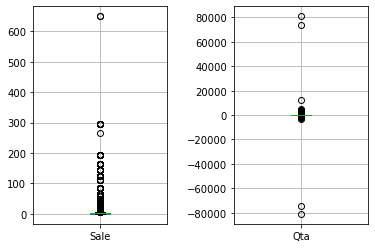

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.boxplot(column=['Sale'], ax=ax1)
df.boxplot(column=['Qta'], ax=ax2)
fig.subplots_adjust(wspace=0.5)

In [32]:
df[df.Sale > 200]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
5962,540647,2011-10-01 14:57:00,295.0,17406,United Kingdom,22655,VINTAGE RED KITCHEN CABINET,1
5998,C540652,2011-10-01 15:04:00,265.5,17406,United Kingdom,22655,VINTAGE RED KITCHEN CABINET,-1
25321,543253,2011-04-02 15:32:00,295.0,14842,United Kingdom,22655,VINTAGE RED KITCHEN CABINET,1
28272,C543632,2011-10-02 16:22:00,295.0,14842,United Kingdom,22655,VINTAGE RED KITCHEN CABINET,-1
52018,546480,2011-03-14 11:38:00,295.0,13452,United Kingdom,22656,VINTAGE BLUE KITCHEN CABINET,1
63315,547814,2011-03-25 14:19:00,295.0,13452,United Kingdom,22656,VINTAGE BLUE KITCHEN CABINET,1
91191,551393,2011-04-28 12:22:00,295.0,14973,United Kingdom,22656,VINTAGE BLUE KITCHEN CABINET,1
117790,554836,2011-05-26 16:25:00,295.0,13015,United Kingdom,22655,VINTAGE RED KITCHEN CABINET,1
130372,556444,2011-10-06 15:28:00,649.5,15098,United Kingdom,22502,PICNIC BASKET WICKER PIECES,60
130381,556446,2011-10-06 15:33:00,649.5,15098,United Kingdom,22502,PICNIC BASKET WICKER PIECES,1


In [33]:
df = df.drop(df[df.Qta > 74000].index)
df = df.drop(df[df.Qta < -74000].index).reset_index(drop=True)

## Final dataset

In [34]:
df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,United Kingdom,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,United Kingdom,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,United Kingdom,20718,RED RETROSPOT SHOPPER BAG,10


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373364 entries, 0 to 373363
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         373364 non-null  object        
 1   BasketDate       373364 non-null  datetime64[ns]
 2   Sale             373364 non-null  float64       
 3   CustomerID       373364 non-null  object        
 4   CustomerCountry  373364 non-null  object        
 5   ProdID           373364 non-null  object        
 6   ProdDescr        373364 non-null  object        
 7   Qta              373364 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 22.8+ MB
